# Project 3: Web Application Programming Interface (API) & Natural Language Processing (NLP)

### Part 2

----

### Contents

[**Part 1**](../code/1_data_scraping.ipynb):

1. Data Scraping

**Part 2** (This workbook):

2. [Data Cleaning](#2.Data-Cleaning)
3. [Preprocessing](#3.Preprocessing)
4. [Exploratory Data Analysis](#4.Exploratory-Data-Analysis)

[**Part 3**](../code/3_modelling.ipynb):

5. Model Selection
6.Conclusion and Recommendations

## 2.Data Cleaning

In [1]:
# Import libraries 
import numpy as np
import pandas as pd
import scipy.stats as stats

# Visual
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Pre-processing
#!pip install emoji 
import emoji
#!pip install nltk
import nltk
#!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS
#!pip install regex
import re

# Modelling
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, plot_roc_curve, roc_auc_score, \
                            accuracy_score, precision_score, recall_score, f1_score, plot_confusion_matrix

# NLP
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
import string

# Others
import time
import datetime as dt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', 100)

import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Load data
ss = pd.read_csv('../data/df_samsung.csv', low_memory = False)
ap = pd.read_csv('../data/df_apple.csv', low_memory = False)

### 2.1.Data Inspection

In [3]:
# Display first 2 rows of Samsung dataset
ss.head(2)

,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_is_blocked,author_patreon_flair,author_premium,awarders,can_mod_post,contest_mode,created_utc,domain,full_link,gildings,id,is_created_from_ads_ui,is_crosspostable,is_meta,is_original_content,is_reddit_media_domain,is_robot_indexable,is_self,is_video,link_flair_background_color,link_flair_richtext,link_flair_template_id,link_flair_text,link_flair_text_color,link_flair_type,locked,media_only,no_follow,num_comments,num_crossposts,over_18,parent_whitelist_status,permalink,pinned,pwls,retrieved_on,score,selftext,send_replies,spoiler,stickied,subreddit,subreddit_id,subreddit_subscribers,subreddit_type,thumbnail,title,total_awards_received,treatment_tags,upvote_ratio,url,whitelist_status,wls,link_flair_css_class,crosspost_parent,crosspost_parent_list,url_overridden_by_dest,author_flair_background_color,author_flair_template_id,author_flair_text_color,post_hint,preview,removed_by_category,suggested_sort,thumbnail_height,thumbnail_width,author_cakeday,poll_data,banned_by,media,media_embed,secure_media,secure_media_embed,edited,media_metadata,distinguished,event_end,event_is_live,event_start,gallery_data,is_gallery
0,[],False,goldaffe58,NaN,[],NaN,text,t2_4yjy8lol,False,False,False,[],False,False,1635525338,self.samsung,https://www.reddit.com/r/samsung/comments/qigt3u/smart_watch_3_and_health_monitor_not_working/,{},qigt3u,False,True,False,False,False,True,True,False,#646d73,[],1a9f93c4-ddaf-11eb-8b21-0e91e42b024f,Help,light,text,False,False,False,0,0,False,all_ads,/r/samsung/comments/qigt3u/smart_watch_3_and_health_monitor_not_working/,False,6,1635525349,1,Hey guys. I bought my mom a new phone. A Samsung because she has galaxy watch 3. But it seems li...,True,False,False,samsung,t5_2rkar,222267,public,self,Smart watch 3 and health monitor not working.,0,[],1.0,https://www.reddit.com/r/samsung/comments/qigt3u/smart_watch_3_and_health_monitor_not_working/,all_ads,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[],False,slaxname,NaN,[],NaN,text,t2_4q80ux4s,False,False,True,[],False,False,1635519994,self.samsung,https://www.reddit.com/r/samsung/comments/qiew3f/hows_everyone_z_flip_3_hinge_holding_up/,{},qiew3f,False,True,False,False,False,True,True,False,#0aa18f,[],04bf68c4-e7f4-11e5-ac6e-0e0021f4fc4f,Discussion,light,text,False,False,True,1,0,False,all_ads,/r/samsung/comments/qiew3f/hows_everyone_z_flip_3_hinge_holding_up/,False,6,1635520005,1,It's been a couple of weeks that I have my z flip 3 and I noticed the hinge has loosened up to w...,True,False,False,samsung,t5_2rkar,222259,public,self,How's everyone Z flip 3 hinge holding up?,0,[],1.0,https://www.reddit.com/r/samsung/comments/qiew3f/hows_everyone_z_flip_3_hinge_holding_up/,all_ads,6,discussion,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Display first 2 rows of Apple dataset
ap.head(2)

,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_is_blocked,author_patreon_flair,author_premium,awarders,can_mod_post,contest_mode,created_utc,domain,full_link,gildings,id,is_created_from_ads_ui,is_crosspostable,is_meta,is_original_content,is_reddit_media_domain,is_robot_indexable,is_self,is_video,link_flair_background_color,link_flair_richtext,link_flair_template_id,link_flair_text,link_flair_text_color,link_flair_type,locked,media_only,no_follow,num_comments,num_crossposts,over_18,parent_whitelist_status,permalink,pinned,post_hint,preview,pwls,retrieved_on,score,selftext,send_replies,spoiler,stickied,subreddit,subreddit_id,subreddit_subscribers,subreddit_type,thumbnail,thumbnail_height,thumbnail_width,title,total_awards_received,treatment_tags,upvote_ratio,url,url_overridden_by_dest,whitelist_status,wls,removed_by_category,link_flair_css_class,media,media_embed,secure_media,secure_media_embed,suggested_sort,author_flair_background_color,author_flair_text_color,author_cakeday,poll_data,distinguished,tournament_data,banned_by,edited,media_metadata,event_end,event_is_live,event_start,crosspost_parent,crosspost_parent_list,gilded,top_awarded_type,discussion_type,steward_reports,removed_by,updated_utc,og_description,og_title
0,[],False,giuliomagnifico,NaN,[],NaN,text,t2_l1ket,False,False,True,[],False,False,1635523517,eclecticlight.co,https://www.reddit.com/r/apple/comments/qig61n/how_macos_is_more_reliable_and_doesnt_need/,{},qig61n,False,True,False,False,False,True,False,False,#1d93f7,"[{'e': 'text', 't': 'macOS'}]",ee3e47ca-5701-11e9-80c7-0e9eeaee42a6,macOS,light,richtext,False,False,True,0,0,False,all_ads,/r/apple/comments/qig61n/how_macos_is_more_reliable_and_doesnt_need/,False,link,"{'enabled': False, 'images': [{'id': 'aB5EVXWOKPhrG_Fk0-5g4BDGvp0sCLBkTZgRr2gwexk', 'resolutions...",6,1635523529,1,NaN,True,False,False,apple,t5_2qh1f,2824202,public,https://a.thumbs.redditmedia.com/s-mkNEkE5t70birh17RrB-wlt7OEcFY33IkKvYvOtW4.jpg,92.0,140.0,"How macOS is more reliable, and doesn’t need reinstalling",0,[],1.0,https://eclecticlight.co/2021/10/29/how-macos-is-more-reliable-and-doesnt-need-reinstalling/,https://eclecticlight.co/2021/10/29/how-macos-is-more-reliable-and-doesnt-need-reinstalling/,all_ads,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[],False,JezalDanLuthar7,NaN,[],NaN,text,t2_1a7zz0pq,False,False,False,[],False,False,1635523440,ft.com,https://www.reddit.com/r/apple/comments/qig51y/microsoft_reclaims_title_of_most_valuable_public/,{},qig51y,False,True,False,False,False,True,False,False,#ff66ac,"[{'e': 'text', 't': 'Discussion'}]",86b258de-5702-11e9-98ce-0eebcac587ec,Discussion,light,richtext,False,False,True,0,0,False,all_ads,/r/apple/comments/qig51y/microsoft_reclaims_title_of_most_valuable_public/,False,link,"{'enabled': False, 'images': [{'id': 'onuRs3-NrJAKNGaGusu1auayayn_InjsX75E7RVwI3I', 'resolutions...",6,1635523454,1,NaN,True,False,False,apple,t5_2qh1f,2824200,public,https://b.thumbs.redditmedia.com/nm8tnhpi08snl7TuBg9WMgkRnOtb7SegEFHpwqXDvJI.jpg,78.0,140.0,Microsoft reclaims title of most valuable public company after Apple falls,0,[],1.0,https://www.ft.com/content/970adae6-6447-47da-8feb-07e9750a7bde,https://www.ft.com/content/970adae6-6447-47da-8feb-07e9750a7bde,all_ads,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Display shape of Samsung dataset
ss.shape

(9994, 89)

In [6]:
# Display shape of Apple dataset
ap.shape

(39772, 95)

### 2.2.Compare Columns

#### Columns in Samsung but not in Apple 

In [7]:
# Checking for columns in Samsung but not in Apple
ss_extra_col_list = [x for x in ss if x not in ap]
ss_extra_col_list

['author_flair_template_id', 'gallery_data', 'is_gallery']

#### Columns in Apple but not in Samsung

In [8]:
# Checking for columns in Apple but not in Samsung
ap_extra_col_list = [x for x in ap if x not in ss]
ap_extra_col_list

['tournament_data',
 'gilded',
 'top_awarded_type',
 'discussion_type',
 'steward_reports',
 'removed_by',
 'updated_utc',
 'og_description',
 'og_title']

### 2.3.Select Columns to Retain

In [9]:
# Examine Samsung columns to retain
ss.head(2)

,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_is_blocked,author_patreon_flair,author_premium,awarders,can_mod_post,contest_mode,created_utc,domain,full_link,gildings,id,is_created_from_ads_ui,is_crosspostable,is_meta,is_original_content,is_reddit_media_domain,is_robot_indexable,is_self,is_video,link_flair_background_color,link_flair_richtext,link_flair_template_id,link_flair_text,link_flair_text_color,link_flair_type,locked,media_only,no_follow,num_comments,num_crossposts,over_18,parent_whitelist_status,permalink,pinned,pwls,retrieved_on,score,selftext,send_replies,spoiler,stickied,subreddit,subreddit_id,subreddit_subscribers,subreddit_type,thumbnail,title,total_awards_received,treatment_tags,upvote_ratio,url,whitelist_status,wls,link_flair_css_class,crosspost_parent,crosspost_parent_list,url_overridden_by_dest,author_flair_background_color,author_flair_template_id,author_flair_text_color,post_hint,preview,removed_by_category,suggested_sort,thumbnail_height,thumbnail_width,author_cakeday,poll_data,banned_by,media,media_embed,secure_media,secure_media_embed,edited,media_metadata,distinguished,event_end,event_is_live,event_start,gallery_data,is_gallery
0,[],False,goldaffe58,NaN,[],NaN,text,t2_4yjy8lol,False,False,False,[],False,False,1635525338,self.samsung,https://www.reddit.com/r/samsung/comments/qigt3u/smart_watch_3_and_health_monitor_not_working/,{},qigt3u,False,True,False,False,False,True,True,False,#646d73,[],1a9f93c4-ddaf-11eb-8b21-0e91e42b024f,Help,light,text,False,False,False,0,0,False,all_ads,/r/samsung/comments/qigt3u/smart_watch_3_and_health_monitor_not_working/,False,6,1635525349,1,Hey guys. I bought my mom a new phone. A Samsung because she has galaxy watch 3. But it seems li...,True,False,False,samsung,t5_2rkar,222267,public,self,Smart watch 3 and health monitor not working.,0,[],1.0,https://www.reddit.com/r/samsung/comments/qigt3u/smart_watch_3_and_health_monitor_not_working/,all_ads,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[],False,slaxname,NaN,[],NaN,text,t2_4q80ux4s,False,False,True,[],False,False,1635519994,self.samsung,https://www.reddit.com/r/samsung/comments/qiew3f/hows_everyone_z_flip_3_hinge_holding_up/,{},qiew3f,False,True,False,False,False,True,True,False,#0aa18f,[],04bf68c4-e7f4-11e5-ac6e-0e0021f4fc4f,Discussion,light,text,False,False,True,1,0,False,all_ads,/r/samsung/comments/qiew3f/hows_everyone_z_flip_3_hinge_holding_up/,False,6,1635520005,1,It's been a couple of weeks that I have my z flip 3 and I noticed the hinge has loosened up to w...,True,False,False,samsung,t5_2rkar,222259,public,self,How's everyone Z flip 3 hinge holding up?,0,[],1.0,https://www.reddit.com/r/samsung/comments/qiew3f/hows_everyone_z_flip_3_hinge_holding_up/,all_ads,6,discussion,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Create a dataframe of columns to retain
retain_col = ['author', 'created_utc', 'subreddit', 'title', 'selftext', 'num_comments']

In [11]:
# Drop all columns that are not useful
ss_clean = ss.drop(ss.columns.difference(retain_col), axis = 1)
ap_clean = ap.drop(ap.columns.difference(retain_col), axis = 1)

In [12]:
# Check shape of Samsung
ss_clean.shape

(9994, 6)

In [13]:
# Check shape of Apple
ap_clean.shape

(39772, 6)

### 2.4.Handle Columns with Null Values

In [14]:
# Check columns for null values in Samsung
ss_null_values = ss_clean.isnull().sum().sort_values(ascending = False)

# Find count of null values as a percentage total number of rows 
for key, value in ss_null_values.items():
    x = round(value/len(ss_clean)*100,2)
    print (f'{key}: {value}, {x}%')

selftext: 2592, 25.94%
author: 0, 0.0%
created_utc: 0, 0.0%
num_comments: 0, 0.0%
subreddit: 0, 0.0%
title: 0, 0.0%


In [15]:
# Check columns for null values in Apple
ap_null_values = ap_clean.isnull().sum().sort_values(ascending = False)

# Find count of null values as a percentage total number of rows 
for key, value in ap_null_values.items():
    x = round(value/len(ap_clean)*100,2)
    print (f'{key}: {value}, {x}%')

selftext: 30908, 77.71%
author: 0, 0.0%
created_utc: 0, 0.0%
num_comments: 0, 0.0%
subreddit: 0, 0.0%
title: 0, 0.0%


Having information captured in the 'selftext' role is critical to our model. Since the percentage of rows with null values for 'selftext' is significant, they will not be useful and we will drop them.

In [16]:
# Drop rows with null values for 'selftext'
ss_clean.dropna(subset=['selftext'], inplace=True)
ap_clean.dropna(subset=['selftext'], inplace=True)

### 2.5.Remove Rows with '[deleted]' or 'AutoModerator' value in 'Author' Column 

In [17]:
# Examine the values for 'author' column for Samsung
ss_clean['author'].value_counts()

AutoModerator           122
[deleted]               111
Brandonjr36              22
Henry345345              19
mooglechoco_             18
Brando224                14
Adzeyah                  12
orhnkyk                  11
CrispyyBacon27           10
mariss242                 9
DEWDEM                    9
RemoteRow                 9
IosifVissarionovici       9
Ocelot859                 8
Kidi_Galaxy               8
AleMaza                   8
mkanet                    8
aweirdperson123           8
CarlosAssi81              8
AlexDoesRandomStuff       8
Deathscyther1HD           7
M1A1Death                 7
MeronDC                   7
iluvapple                 7
Stephancevallos905        7
DV2FOX                    7
temubrin                  6
tz9bkf1                   6
mercenary_58              6
shaqwade2006              6
jontebula                 6
CommonSense07             6
Gamingkiller99            6
SyCoREAPER                6
andreyred                 6
izuzev_mene         

In [18]:
# Examine the values for 'author' column for Apple
ap_clean['author'].value_counts()

AutoModerator           822
[deleted]               681
exjr_                    77
aaronp613                57
ZeroAndUnder             14
paprikajancsi01          10
iamthatis                 9
clemenslucas              8
turquoisehexagon-sun      7
ScotchBrandyBourbon       7
nstrm                     7
Shihab_8                  7
Daniel-Springer           6
GaelG721                  6
askcupido                 6
ajc9630                   6
duoji-                    6
crepuscopoli              5
walktall                  5
ineedlesssleep            5
alreadyTakenMyFoot        5
taiomi                    4
nonehill                  4
itscrazouthere            4
henryo84                  4
DrSteveBrule_             4
Goalstorm15               4
OfficerWade               4
Waylan-J-Sands            4
amanj203                  4
atalkingfish              4
NXB_music                 4
lafuenter03               4
Coliinnn                  3
whatinsidethebox          3
MrOaiki             

There are posts from moderators ('AutoModerator') as well as deleted posts ('[deleted]'), which could add biases to the model. Hence, they will also be dropped. 

In [19]:
# Drop rows with '[deleted]' or 'AutoModerator' value
ss_clean.drop(ss_clean[ss_clean['author'] == '[deleted]'].index, inplace =True)
ss_clean.drop(ss_clean[ss_clean['author'] == 'AutoModerator'].index, inplace =True)

ap_clean.drop(ap_clean[ap_clean['author'] == '[deleted]'].index, inplace =True)
ap_clean.drop(ap_clean[ap_clean['author'] == 'AutoModerator'].index, inplace =True)

### 2.6.Convert to Readable DateTime

In [20]:
# Convert to readable datetime from unix time in Samsung
ss_clean['date']= pd.to_datetime(ss_clean['created_utc'], unit='s')
ss_clean = ss_clean.drop('created_utc',axis=1)

In [21]:
# Convert to readable datetime from unix time in Apple
ap_clean['date']= pd.to_datetime(ap_clean['created_utc'], unit='s')
ap_clean = ap_clean.drop('created_utc',axis=1)

### 2.7.Check for Duplicates

In [22]:
# Create columns to check for duplicates
col_names = ['title', 'selftext']

In [23]:
# Display duplicates for Samsung
ss_duplicates = ss_clean.duplicated(subset=col_names, keep = False)
ss_clean[ss_duplicates].sort_values(by='author').head()

,author,num_comments,selftext,subreddit,title,date
930,Abyssrealm,36,"I ordered my fold 3 bundle on September 10th. Original expecting day was September 28th, now it'...",samsung,Anyone experiencing Shipping Delays?,2021-09-22 20:06:41
931,Abyssrealm,6,"I ordered my fold 3 bundle on September 10th. Original expecting day was September 28th, now it'...",samsung,Anyone experiencing Shipping Delays?,2021-09-22 20:06:23
9083,Anusprolapsaucee,0,Everytime I want to focus my camera say on a book the text is unreadable blurry from any distanc...,samsung,Samsung galaxy s 20 camera focus on text,2021-02-22 14:46:27
9084,Anusprolapsaucee,0,Everytime I want to focus my camera say on a book the text is unreadable blurry from any distanc...,samsung,Samsung galaxy s 20 camera focus on text,2021-02-22 14:46:15
7120,BYSTrinity,0,"I'm having a problem with my S21 where when I save an edited photo in Google Photos, the saved i...",samsung,Google Photos issues,2021-04-09 01:29:49


In [24]:
# Display duplicates for Apple
ap_duplicates = ap_clean.duplicated(subset=col_names, keep = False)
ap_clean[ap_duplicates].sort_values(by='author').head()

,author,num_comments,selftext,subreddit,title,date
22571,BasicEight6467,4,When i open the books app on my iPhone it starts downloading some apps i purchased before I don’...,apple,Books app bug,2020-05-02 01:20:18
22572,BasicEight6467,0,When i open the books app on my iPhone it starts downloading some apps i purchased before I don’...,apple,Books app bug,2020-05-02 01:20:13
2355,Classic-Restaurant15,2,"How can I cancel my Apple Game Center subscription from my android phone, or can I use my chrome...",apple,Apple Game Center,2021-09-11 06:29:49
2356,Classic-Restaurant15,1,"How can I cancel my Apple Game Center subscription from my android phone, or can I use my chrome...",apple,Apple Game Center,2021-09-11 06:29:19
2357,Classic-Restaurant15,2,"How can I cancel my Apple Game Center subscription from my android phone, or can I use my chrome...",apple,Apple Game Center,2021-09-11 06:28:59


Since there are duplicates found in both Samsung and Apple datasets, we will drop all except one of each duplicates.

In [25]:
# Retain only 1 of the duplicates
ss_clean.drop_duplicates(subset=col_names, inplace = True)
ap_clean.drop_duplicates(subset=col_names, inplace = True) 

In [26]:
# Check null values for Samsung
ss_clean.isnull().sum()

author          0
num_comments    0
selftext        0
subreddit       0
title           0
date            0
dtype: int64

In [27]:
# Check null values for Apple
ap_clean.isnull().sum()

author          0
num_comments    0
selftext        0
subreddit       0
title           0
date            0
dtype: int64

In [28]:
# Check shape of Samsung
ss_clean.shape

(7107, 6)

In [29]:
# Check shape of Apple
ap_clean.shape

(7311, 6)

## 3.Preprocessing 

While there are no longer any null values in the data, majority of data is still highly unstructured and noisy. In this section, we will perform certain preprocessing routines of the textual data so as to facilitate the development of a high-quality machine learning algorithm and generate better insights. 

### 3.1.Remove Punctuations

In [30]:
# Create a function to return text without punctuation 
# String has been imported
def remove_punct(text):
    text_nopunct = ''.join([char for char in text if char not in string.punctuation])   # add char if char not punctuation 
    return text_nopunct

### 3.2.Lowercasing

In [31]:
# Create a function to return text in all lower case
def lowercasing(text):
    text_lowercasing = text.lower()
    return text_lowercasing

### 3.3.Remove Emojis

In [32]:
# Create a function to return text without emojis
# re has been imported
# Source: https://gist.github.com/slowkow/7a7f61f495e3dbb7e3d767f97bd7304b

def remove_emoji(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r' ', text)

### 3.4.Remove Non-BMP Unicode Characters

In [33]:
# Create a function to remove characters beyond Basic Multilingual Plane (BMP) of Unicode (e.g. maths symbols)
def remove_nonbmp(text):
    text_bmp = ''.join(char for char in text if char <= '\uFFFF') 
    return text_bmp

### 3.5.Remove HTML special entities

In [34]:
# Create a function to remove HTML special entities (e.g. &amp;)
def remove_html(text):
    text_nohtml = re.sub(r'\&\w*;', '', text)
    return text_nohtml

### 3.6.Remove Hyperlinks

In [35]:
# Create a function to remove hyperlinks
def remove_hyperlink(text):
    text_nohyperlink = re.sub(r'https?:\/\/.*\/\w*', '', text)
    return text_nohyperlink

### 3.7.Remove Shortwords

In [36]:
# Create a function to remove words with 2 or fewer letters
def remove_shortwords(text):     
    text_noshortwords = re.sub(r'\b\w{1,2}\b', '', text)
    return text_noshortwords

### 3.8.Remove Whitespaces

In [37]:
# Create a function to remove whitespace (including new line characters)
def remove_whites(text):    
    text_nowhites = re.sub(r'\s\s+', ' ', text)
    return text_nowhites

### 3.9.Tokenization

In [38]:
# Create a function to return a list of words from sentences
# re has been imported

def tokenize(text):
    # \W matches any non-word character (equivalent to [^a-zA-Z0-9_]). This does not include spaces i.e. \s
    # Add a + just in case there are 2 or more spaces between certain words
    tokens = re.split('\W+', text)
    return tokens

### 3.10.Remove Stopwords 

In [39]:
# Create a function to return word if it is not found in the stopword i.e. it is not a stopword
# nltk has been imported

stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text_nostopwords = [word for word in text if word not in stopword]
    return text_nostopwords

### 3.11.Lemmatization

In [40]:
# Create a function that creates a lemmatized version of the text 
# nltk has been imported

wn = nltk.WordNetLemmatizer()

def lemmatize(text):
    # return list of all lemmatized words for their corresponding words in text
    text = [wn.lemmatize(word) for word in text]
    return (' '.join(text))

### 3.12.Text Cleaning 

In [41]:
# Create function for pre-processing
# Source: https://towardsdatascience.com/cleaning-preprocessing-text-data-by-building-nlp-pipeline-853148add68a
# Source: https://towardsdatascience.com/the-real-world-as-seen-on-twitter-sentiment-analysis-part-one-5ac2d06b63fb

def cleaner(text)  :
    text = remove_punct(text)
    text = lowercasing(text)
    text = remove_emoji(text)  
    text = remove_nonbmp(text)
    text = remove_html(text)
    text = remove_hyperlink(text) 
    text = remove_shortwords(text)
    text = remove_whites(text)    
    text = tokenize(text)
    text = remove_stopwords(text)
    text = lemmatize(text)
    return text    

In [42]:
# Examine 'title' before cleaning Samsung 
ss_clean['title'].head()

0    Smart watch 3 and health monitor not working.
1        How's everyone Z flip 3 hinge holding up?
2             Looking for a case for Galaxy Note 9
4                         Note 10+ vs S20FE vs S20
5     Anyong here coming from Google Pixel phones?
Name: title, dtype: object

In [43]:
# Examine 'selftext' before cleaning Samsung
ss_clean['selftext'].head()

0    Hey guys. I bought my mom a new phone. A Samsung because she has galaxy watch 3. But it seems li...
1    It's been a couple of weeks that I have my z flip 3 and I noticed the hinge has loosened up to w...
2    My wife resists change, and wants to hold on to her Note 9 for as long as possible, but she keep...
4    Currently have a Note 9 with a not so great battery. \n\nI live in a 5g area and would like to s...
5    What is your experience?\nI've been eyeing the Z fold 3. But I'm still a huge fan of Pixel phone...
Name: selftext, dtype: object

In [44]:
# Examine 'title' before cleaning Apple 
ap_clean['title'].head()

32                                                                                                  help.
35                                  Should I get the new iPhone 13 pro max or wait for the new iPhone 14?
36                                                           Anyone having trouble with Apple Card today?
41                                                                                 Advices on iPad Air 4?
45    Quick question about the new MacBook Pros: does the screen open to the same degree as the previo...
Name: title, dtype: object

In [45]:
# Examine 'selftext' before cleaning Samsung
ap_clean['selftext'].head()

32                               file:///Users/onel/Desktop/problem.png\n\nwhere are my plug in settings?
35    I've had the iPhone 7 since its release in 2016 and it has been one of my biggest regrets to dat...
36    I used my card fine last night. This morning I tried to make a payment and it said “Apple pay se...
41    I just bought the latest version of the iPad Air for college and my personal stuff as well. I al...
45    Haven't seen this mentioned in any reviews yet. If I recall, the old ones opened to about 125 de...
Name: selftext, dtype: object

In [46]:
# Apply cleaner function to 'title' and 'selftext' for Samsung and Apple
ss_clean['title'] = ss_clean['title'].apply(cleaner)
ss_clean['selftext'] = ss_clean['selftext'].apply(cleaner)
ap_clean['title'] = ap_clean['title'].apply(cleaner)
ap_clean['selftext'] = ap_clean['selftext'].apply(cleaner)

In [47]:
# Examine 'title' after cleaning Samsung 
ss_clean['title'].head()

0    smart watch health monitor working
1     hows everyone flip hinge holding 
2             looking case galaxy note 
4                        note s20fe s20
5      anyong coming google pixel phone
Name: title, dtype: object

In [48]:
# Examine 'selftext' after cleaning Samsung
ss_clean['selftext'].head()

0    hey guy bought mom new phone samsung galaxy watch seems like health monitor working new samsung ...
1    couple week flip noticed hinge loosened first got hinge experience going flip would compare hing...
2     wife resists change want hold note long possible keep shattering glass camera time bought case ...
4    currently note great battery live area would like start taking advantage ive narrowed three opti...
5    experience ive eyeing fold still huge fan pixel phone ive never samsung would like know youre ex...
Name: selftext, dtype: object

In [49]:
# Examine 'title' after cleaning Apple 
ap_clean['title'].head()

32                                                                     help
35                                  get new iphone pro max wait new iphone 
36                                          anyone trouble apple card today
41                                                         advice ipad air 
45    quick question new macbook pro screen open degree previous generation
Name: title, dtype: object

In [50]:
# Examine 'selftext' after cleaning Samsung
ap_clean['selftext'].head()

32                                                            fileusersoneldesktopproblempng plug setting
35    ive iphone since release 2016 one biggest regret date remember begging parent week buy new iphon...
36     used card fine last night morning tried make payment said apple pay service unavailable called ...
41     bought latest version ipad air college personal stuff well also purchased apple pencil trick ap...
45    havent seen mentioned review yet recall old one opened 125 degree loved thinkpad thatd open 180 ...
Name: selftext, dtype: object

### 3.13.Other Manipulations of Dataframes

To facilitate our Exploratory Data Analysis later, we will perform the following:
* Create a 'date' column for timeseries analysis of posts
*Create 'title_len' and 'selftext_len' columns to analyse the length of the posts contents

In [51]:
# Store 'date' as a string object in 'string_date'
ss_clean['string_date'] = ss_clean['date']
ap_clean['string_date'] = ap_clean['date']

ap_clean['datetime'] = pd.to_datetime(ap_clean['date'])
ap_clean['date'] = ap_clean['datetime'].apply(lambda x: x.date())

ss_clean['datetime'] = pd.to_datetime(ss_clean['date'])
ss_clean['date'] = ss_clean['datetime'].apply(lambda x: x.date())

In [52]:
# Create new columns for 'title_len' and 'selftext_len'
ss_clean['title_len'] = ss_clean['title'].str.len()
ss_clean['selftext_len'] = ss_clean['selftext'].str.len()
ap_clean['title_len'] = ap_clean['title'].str.len()
ap_clean['selftext_len'] = ap_clean['selftext'].str.len()

In order for our model to predict the target Y-variable (i.e. r/Samsung or r/Apple), we will need to set up the binary classes:

    1 = r/Samsung
    0 = r/Apple

In [53]:
# Change subreddits to int 1 and 0
ss_clean['is_samsung'] = 1
ap_clean['is_samsung'] = 0

As both 'selftext' and 'title' columns contain useful text for our models, we will combine them into one single 'text' column. Before combining the 2 columns, we will first check whether there are any duplicates between 'selftext' and 'title' and drop them accordingly.

In [54]:
# Check for duplicates between 'selftext' and 'title' for Samsung
ss_clean[(ss_clean['selftext'] == ss_clean['title'])]

,author,num_comments,selftext,subreddit,title,date,string_date,datetime,title_len,selftext_len,is_samsung
90,OrdinaryAsk1,5,s20 get one android,samsung,s20 get one android,2021-10-26,2021-10-26 16:17:25,2021-10-26 16:17:25,20,20,1
336,bigchanges2402,31,cheap phone doesnt break half,samsung,cheap phone doesnt break half,2021-10-16,2021-10-16 09:41:35,2021-10-16 09:41:35,30,30,1
561,batmonkey7,7,one beta finally live,samsung,one beta finally live,2021-10-06,2021-10-06 12:10:37,2021-10-06 12:10:37,22,22,1
835,HeshoMike,11,make battery explode,samsung,make battery explode,2021-09-26,2021-09-26 17:21:07,2021-09-26 17:21:07,20,20,1
1094,Dyis72,4,best samsungmobile le 400 euro,samsung,best samsungmobile le 400 euro,2021-09-16,2021-09-16 21:38:25,2021-09-16 21:38:25,30,30,1
1997,unrequited,10,prereservation fold 3flip get morning cant currently log see whats different,samsung,prereservation fold 3flip get morning cant currently log see whats different,2021-08-11,2021-08-11 15:43:52,2021-08-11 15:43:52,77,77,1
2546,Perma,2,test,samsung,test,2021-07-05,2021-07-05 17:59:05,2021-07-05 17:59:05,4,4,1
2760,Cody_Python13,7,galaxy wa2 died yesterday didnt think much stuck stuck boot loop cant get actually charge come ...,samsung,galaxy wa2 died yesterday didnt think much stuck stuck boot loop cant get actually charge come ...,2021-07-01,2021-07-01 15:39:26,2021-07-01 15:39:26,170,170,1
2898,jalapingooo,4,anyone el camera become really darker lose colour going past zoom galaxy s21,samsung,anyone el camera become really darker lose colour going past zoom galaxy s21,2021-06-29,2021-06-29 07:07:01,2021-06-29 07:07:01,76,76,1
3028,Cody_Python13,3,samsung crystal uhd 43inch model number un43tu8000fxza havent able use update function ever sin...,samsung,samsung crystal uhd 43inch model number un43tu8000fxza havent able use update function ever sin...,2021-06-27,2021-06-27 04:41:01,2021-06-27 04:41:01,199,199,1


In [55]:
# Check for duplicates between 'selftext' and 'title' for Apple
ap_clean[(ap_clean['selftext'] == ap_clean['title'])]

,author,num_comments,selftext,subreddit,title,date,string_date,datetime,title_len,selftext_len,is_samsung
1058,Dependent_Ad7334,0,price iphone worth long term compared android device come durability longevity,apple,price iphone worth long term compared android device come durability longevity,2021-10-07,2021-10-07 13:04:08,2021-10-07 13:04:08,79,79,0
2770,Ahmetozgurersanli,1,hello anyone know adobe crack link suitable system,apple,hello anyone know adobe crack link suitable system,2021-09-01,2021-09-01 12:42:17,2021-09-01 12:42:17,50,50,0
3942,makapuu,1,last test,apple,last test,2021-08-05,2021-08-05 16:05:14,2021-08-05 16:05:14,9,9,0
4304,Pitiful_Phone1921,0,,apple,,2021-07-25,2021-07-25 07:10:01,2021-07-25 07:10:01,0,0,0
19822,lockstock44,0,steve jobsentrepreneurlegend success secret,apple,steve jobsentrepreneurlegend success secret,2020-06-28,2020-06-28 08:27:17,2020-06-28 08:27:17,43,43,0
20338,YogurtclosetBubbly50,0,,apple,,2020-06-22,2020-06-22 12:40:53,2020-06-22 12:40:53,0,0,0
21714,Ilikegammon,0,batter health iphone nearly month,apple,batter health iphone nearly month,2020-05-22,2020-05-22 11:47:53,2020-05-22 11:47:53,33,33,0
22166,IgnitedSoulZ,0,macbook pro 2019 able drive pro display xdr,apple,macbook pro 2019 able drive pro display xdr,2020-05-11,2020-05-11 12:04:10,2020-05-11 12:04:10,44,44,0
22219,dumbGuyWithQuestions,0,test,apple,test,2020-05-10,2020-05-10 01:22:55,2020-05-10 01:22:55,4,4,0
23511,Aytexn,0,app speed whatsapp voice message,apple,app speed whatsapp voice message,2020-04-23,2020-04-23 14:19:34,2020-04-23 14:19:34,33,33,0


In [56]:
# Drop duplicates
ss_clean.drop(ss_clean[(ss_clean['selftext'] == ss_clean['title'])].index, inplace =True)
ap_clean.drop(ap_clean[(ap_clean['selftext'] == ap_clean['title'])].index, inplace =True)

In [57]:
# Merge 'title' and 'selftext' columns
ss_clean['text'] = ss_clean['title'] + " " + ss_clean['selftext']
ap_clean['text'] = ap_clean['title'] + " " + ap_clean['selftext']

In [58]:
# Final check of the clean Samsung dataset
ss_clean.head()

,author,num_comments,selftext,subreddit,title,date,string_date,datetime,title_len,selftext_len,is_samsung,text
0,goldaffe58,0,hey guy bought mom new phone samsung galaxy watch seems like health monitor working new samsung ...,samsung,smart watch health monitor working,2021-10-29,2021-10-29 16:35:38,2021-10-29 16:35:38,34,327,1,smart watch health monitor working hey guy bought mom new phone samsung galaxy watch seems like ...
1,slaxname,1,couple week flip noticed hinge loosened first got hinge experience going flip would compare hing...,samsung,hows everyone flip hinge holding,2021-10-29,2021-10-29 15:06:34,2021-10-29 15:06:34,33,102,1,hows everyone flip hinge holding couple week flip noticed hinge loosened first got hinge experi...
2,shawnhoefer1,1,wife resists change want hold note long possible keep shattering glass camera time bought case ...,samsung,looking case galaxy note,2021-10-29,2021-10-29 14:56:03,2021-10-29 14:56:03,25,146,1,looking case galaxy note wife resists change want hold note long possible keep shattering glas...
4,Sad-Guess-3148,1,currently note great battery live area would like start taking advantage ive narrowed three opti...,samsung,note s20fe s20,2021-10-29,2021-10-29 14:10:56,2021-10-29 14:10:56,14,142,1,note s20fe s20 currently note great battery live area would like start taking advantage ive narr...
5,klnm28,1,experience ive eyeing fold still huge fan pixel phone ive never samsung would like know youre ex...,samsung,anyong coming google pixel phone,2021-10-29,2021-10-29 13:25:58,2021-10-29 13:25:58,32,167,1,anyong coming google pixel phone experience ive eyeing fold still huge fan pixel phone ive never...


In [59]:
# Final check of the clean Apple dataset
ap_clean.head()

,author,num_comments,selftext,subreddit,title,date,string_date,datetime,title_len,selftext_len,is_samsung,text
32,Tall-Percentage-7589,0,fileusersoneldesktopproblempng plug setting,apple,help,2021-10-28,2021-10-28 23:17:15,2021-10-28 23:17:15,4,43,0,help fileusersoneldesktopproblempng plug setting
35,you_didnt_CAPTCHA_me,0,ive iphone since release 2016 one biggest regret date remember begging parent week buy new iphon...,apple,get new iphone pro max wait new iphone,2021-10-28,2021-10-28 21:27:37,2021-10-28 21:27:37,39,317,0,get new iphone pro max wait new iphone ive iphone since release 2016 one biggest regret date re...
36,ImpressiveTaco,0,used card fine last night morning tried make payment said apple pay service unavailable called ...,apple,anyone trouble apple card today,2021-10-28,2021-10-28 21:24:58,2021-10-28 21:24:58,31,325,0,anyone trouble apple card today used card fine last night morning tried make payment said apple...
41,roythaqueen,0,bought latest version ipad air college personal stuff well also purchased apple pencil trick ap...,apple,advice ipad air,2021-10-28,2021-10-28 19:45:19,2021-10-28 19:45:19,16,142,0,advice ipad air bought latest version ipad air college personal stuff well also purchased appl...
45,lnterim,0,havent seen mentioned review yet recall old one opened 125 degree loved thinkpad thatd open 180 ...,apple,quick question new macbook pro screen open degree previous generation,2021-10-28,2021-10-28 18:36:09,2021-10-28 18:36:09,69,132,0,quick question new macbook pro screen open degree previous generation havent seen mentioned revi...


In [60]:
# Check shape of Samsung
ss_clean.shape

(7068, 12)

In [61]:
# Check shape of Apple 
ap_clean.shape

(7291, 12)

The separate Samsung and Apple datasets are now in order.

In [62]:
# Save a copy of the clean dataframes 
ss_clean.to_csv('../data/ss_clean.csv', index = False)
ap_clean.to_csv('../data/ap_clean.csv', index = False)

Finally, we will combine both Samsung and Apple datasets. 

In [63]:
# Combine both Samsung and Apple datasets
df = pd.concat([ss_clean, ap_clean], ignore_index=True)

In [64]:
# Check that data has been combined correctly
df.shape

(14359, 12)

In [65]:
# Save dataframe
df.to_csv('../data/df.csv', index = False)

## 4.Exploratory Data Analysis

Before performing visual analysis of our data, we will have a high-level overview of the summary statistics.

### 4.1.Summary Statistics

In [66]:
# Summary of Samsung
ss_clean.describe(include='all')

,author,num_comments,selftext,subreddit,title,date,string_date,datetime,title_len,selftext_len,is_samsung,text
count,7068,7068.000000,7068,7068,7068,7068,7068,7068,7068.000000,7068.000000,7068.0,7068
unique,5746,NaN,6985,1,6940,247,7065,7065,NaN,NaN,NaN,7057
top,Brandonjr36,NaN,title,samsung,,2021-02-11,2021-07-01 15:29:26,2021-07-01 15:29:26,NaN,NaN,NaN,lack security update unlocked note8 understand samsung note8 graduated quarterly update last ye...
freq,22,NaN,21,7068,9,73,2,2,NaN,NaN,NaN,3
first,NaN,NaN,NaN,NaN,NaN,NaN,2021-02-10 20:45:35,2021-02-10 20:45:35,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,2021-10-29 16:35:38,2021-10-29 16:35:38,NaN,NaN,NaN,NaN
mean,NaN,11.710385,NaN,NaN,NaN,NaN,NaN,NaN,34.516695,241.175863,1.0,NaN
std,NaN,27.027729,NaN,NaN,NaN,NaN,NaN,NaN,20.899454,278.510467,0.0,NaN
min,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.0,NaN
25%,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,21.000000,96.000000,1.0,NaN


In [67]:
# Summary of Apple
ap_clean.describe(include='all')

,author,num_comments,selftext,subreddit,title,date,string_date,datetime,title_len,selftext_len,is_samsung,text
count,7291,7291.000000,7291,7291,7291,7291,7291,7291,7291.000000,7291.000000,7291.0,7291
unique,6750,NaN,7236,1,7105,596,7289,7289,NaN,NaN,NaN,7287
top,exjr_,NaN,title,apple,help,2019-09-12,2020-05-09 05:56:52,2020-05-09 05:56:52,NaN,NaN,NaN,revo reverse video seamlessly switch front rear camera recording one take apps available offer f...
freq,77,NaN,15,7291,15,62,2,2,NaN,NaN,NaN,2
first,NaN,NaN,NaN,NaN,NaN,NaN,2019-06-25 01:21:36,2019-06-25 01:21:36,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,2021-10-28 23:17:15,2021-10-28 23:17:15,NaN,NaN,NaN,NaN
mean,NaN,58.697710,NaN,NaN,NaN,NaN,NaN,NaN,37.065972,330.794678,0.0,NaN
std,NaN,2390.382652,NaN,NaN,NaN,NaN,NaN,NaN,25.065569,559.627876,0.0,NaN
min,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.0,NaN
25%,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,21.000000,107.000000,0.0,NaN


In [68]:
# Summary of Samsung
ss_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7068 entries, 0 to 9993
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   author        7068 non-null   object        
 1   num_comments  7068 non-null   int64         
 2   selftext      7068 non-null   object        
 3   subreddit     7068 non-null   object        
 4   title         7068 non-null   object        
 5   date          7068 non-null   object        
 6   string_date   7068 non-null   datetime64[ns]
 7   datetime      7068 non-null   datetime64[ns]
 8   title_len     7068 non-null   int64         
 9   selftext_len  7068 non-null   int64         
 10  is_samsung    7068 non-null   int64         
 11  text          7068 non-null   object        
dtypes: datetime64[ns](2), int64(4), object(6)
memory usage: 717.8+ KB


In [69]:
# Summary of Apple
ap_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7291 entries, 32 to 39771
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   author        7291 non-null   object        
 1   num_comments  7291 non-null   int64         
 2   selftext      7291 non-null   object        
 3   subreddit     7291 non-null   object        
 4   title         7291 non-null   object        
 5   date          7291 non-null   object        
 6   string_date   7291 non-null   datetime64[ns]
 7   datetime      7291 non-null   datetime64[ns]
 8   title_len     7291 non-null   int64         
 9   selftext_len  7291 non-null   int64         
 10  is_samsung    7291 non-null   int64         
 11  text          7291 non-null   object        
dtypes: datetime64[ns](2), int64(4), object(6)
memory usage: 740.5+ KB


### 4.2.Volume of Posts

As we have the 'date' of the posts, we can generate a time-series representation of the volume of posts that were submitted across the scrapped period. 

Let us take a look at the volume of r/Samsung posts across the scrapped period.

In [70]:
# Create a function for summary stats (for commentary below)
def post_period(subreddit, data):
    highest_post = data['date'].value_counts().max()
    lowest_post = data['date'].value_counts().min()
    first_post = data['date'].min()
    last_post = data['date'].max()
    subreddit = subreddit
    print(f'From the dataset between {first_post} and {last_post}, r/{subreddit} sees approximately {lowest_post} to {highest_post} number of posts per day.')

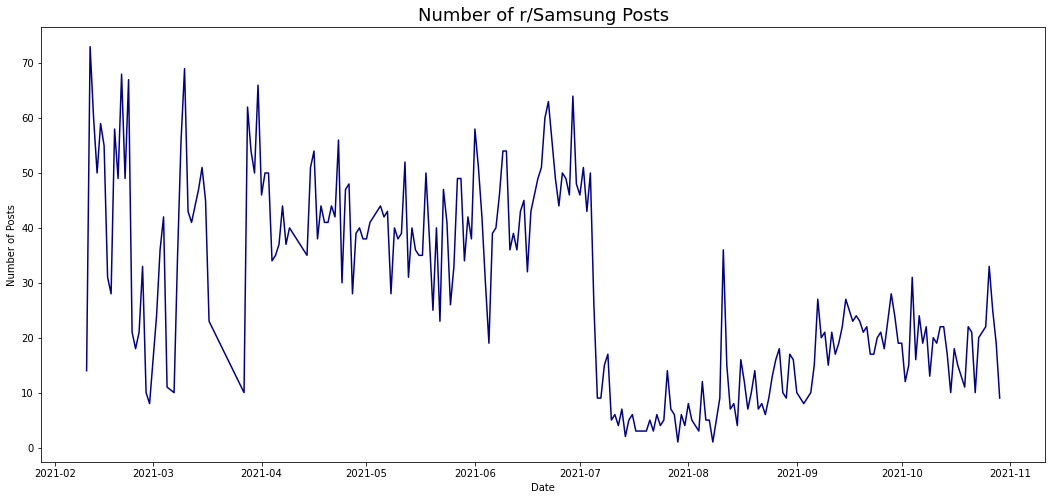

In [71]:
# Plot timeseries of the post volume for Samsung
ss_clean['date'].value_counts().plot(figsize = (18,8), color = 'darkblue')
plt.xlabel('Date')
plt.ylabel('Number of Posts')
plt.title('Number of r/Samsung Posts', fontsize=18)

# Save plot
plt.savefig('../plots/timeseries_ss_vol.png', dpi=150, bbox_inches='tight')

In [72]:
# Print commentary on post Samsung volume
post_period('Samsung', ss_clean)

From the dataset between 2021-02-10 and 2021-10-29, r/Samsung sees approximately 1 to 73 number of posts per day.


There was a noticable spike in r/Samsung posts in mid-Aug 2021. This higher traction could be due to the Galaxy Unpacked event held on 11 Aug 2021, which is a biannual event held by Samsung where it showcases new devices including smartphones, tablets, and wearables. The previous one was on 14 Jan 2021, which was out of our scrapped period.

Let us take a look at the volume of r/Apple posts across the scrapped period.

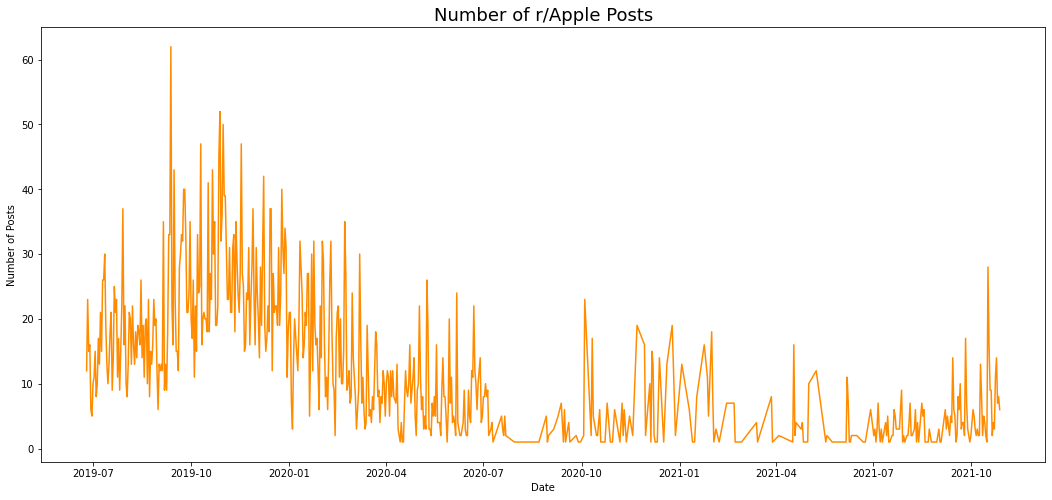

In [73]:
# Plot timeseries of the post volume for Apple
ap_clean['date'].value_counts().plot(figsize = (18,8), color = 'darkorange')
plt.xlabel('Date')
plt.ylabel('Number of Posts')
plt.title('Number of r/Apple Posts', fontsize=18)

# Save plot
plt.savefig('../plots/timeseries_ap_vol.png', dpi=150, bbox_inches='tight')

In [74]:
# Print commentary on Apple post volume
post_period('Apple', ap_clean)

From the dataset between 2019-06-25 and 2021-10-28, r/Apple sees approximately 1 to 62 number of posts per day.


In [75]:
# Check for highest volume of Apple posts
ap_clean['date'].value_counts().head()

2019-09-12    62
2019-10-28    52
2019-10-31    50
2019-11-17    47
2019-10-10    47
Name: date, dtype: int64

There was a significant spike in r/Apple posts from 12 Sept 2019. This corroborated with the higher interest from the public with the release of the new iphone 11 which was unveiled on 10 Sept 2019 (Preorders began on 13 Sept 2019). 

### 4.3.Length of Title

Next, let us take a look at the average length of the title and selftext across the scrapped posts. 

In [76]:
# Create a function for histogram subplots

def subplot_histograms(data_1, data_2, col, graph_title, bins):
    fig, ax = plt.subplots(1, 2, figsize=(12,6), sharey=True)
    ax = ax.ravel()
    
    # Plot first subreddit  
    g1 = sns.histplot(data=data_1, x=data_1[col].str.len(), ax = ax[0], bins=bins, color='darkblue')
    mean_1 = data_1[col].str.len().mean()
    ax[0].axvline(mean_1, ls='--', color='crimson')
    g1.set_title(f'r/Samsung (Mean: {round(mean_1)} characters)')
    g1.set_xlabel(f'Length of {col.capitalize()}')
    
    # Plot second subreddit
    g2 = sns.histplot(data=data_2, x=data_2[col].str.len(), ax = ax[1], bins=bins, color='darkorange')
    mean_2 = data_2[col].str.len().mean()
    ax[1].axvline(mean_2, ls='--', color='crimson')
    g2.set_title(f'r/Apple (Mean: {round(mean_2)} characters)')
    g2.set_xlabel(f'Length of {col.capitalize()}')
    plt.suptitle(graph_title, fontsize=20)
    plt.tight_layout()

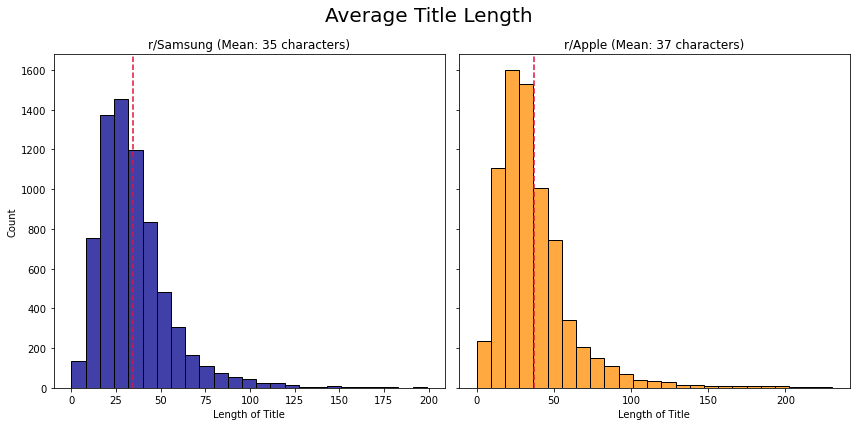

In [77]:
# Display plot
subplot_histograms(ss_clean, ap_clean, 'title', 'Average Title Length', 25)

# Save plot
plt.savefig('../plots/hist_title_length.png', dpi=150, bbox_inches='tight')

In [78]:
# Create a function for summary stats (for commentary below)
def length_col(subreddit, data, col):
    min_length = data[col].str.len().min()
    max_length = data[col].str.len().max()
    mean_length = round(data[col].str.len().mean())
    subreddit = subreddit
    print(f'The length of {col} for posts under r/{subreddit} ranges from {min_length} to {max_length} words (Mean: {mean_length}).')

In [79]:
# Print commentary on title length for Samsung
length_col('Samsung', ss_clean,'title')

The length of title for posts under r/Samsung ranges from 0 to 199 words (Mean: 35).


In [80]:
# Display outliers in 'title_len' for Samsung
ss_clean.sort_values(by='title_len', ascending = False).head(1)

,author,num_comments,selftext,subreddit,title,date,string_date,datetime,title_len,selftext_len,is_samsung,text
377,globuni09,5,hindu power rising many intelligent wealthy powerful hindu know work invest amazon customer amaz...,samsung,hindu power rising many intelligent wealthy powerful hindu know work invest amazon customer amaz...,2021-10-13,2021-10-13 23:24:43,2021-10-13 23:24:43,199,983,1,hindu power rising many intelligent wealthy powerful hindu know work invest amazon customer amaz...


In [81]:
# Print commentary on title length for Apple 
length_col('Apple', ap_clean,'title')

The length of title for posts under r/Apple ranges from 0 to 230 words (Mean: 37).


In [82]:
# Display outliers in 'title_len' for Apple
ap_clean.sort_values(by='title_len', ascending = False).head(1)

,author,num_comments,selftext,subreddit,title,date,string_date,datetime,title_len,selftext_len,is_samsung,text
16789,iamthatis,343,hey apple subreddit developer apollo reddit reddit app io apple community really kind past wante...,apple,self promo saturday today released version apollo reddit app includes ton new feature addition l...,2020-09-12,2020-09-12 16:14:02,2020-09-12 16:14:02,230,5145,0,self promo saturday today released version apollo reddit app includes ton new feature addition l...


From the above posts with longest title length, we did not note any discrepencies with the contents. Hence, no efforts will be taken to drop them. 

### 4.4.Length of Selftext

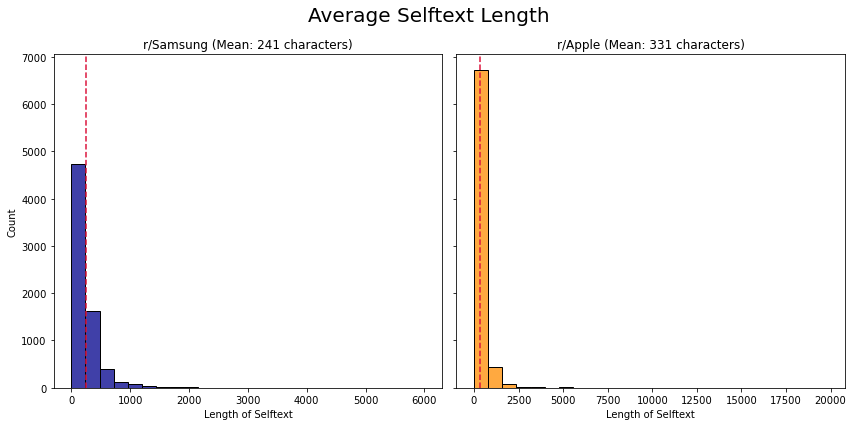

In [83]:
# Display plot
subplot_histograms(ss_clean, ap_clean, 'selftext', 'Average Selftext Length', 25)

# Save plot
plt.savefig('../plots/hist_selftext_length.png', dpi=150, bbox_inches='tight')

In [84]:
# Print commentary on selftext length for Samsung
length_col('Samsung', ss_clean,'selftext')

The length of selftext for posts under r/Samsung ranges from 0 to 6001 words (Mean: 241).


In [85]:
# Display outliers in 'selftext_len' for Samsung
ss_clean.sort_values(by='selftext_len', ascending = False).head(1)

,author,num_comments,selftext,subreddit,title,date,string_date,datetime,title_len,selftext_len,is_samsung,text
1440,CJoshuaV,16,longtime tech enthusiast power user frequently early adopter phone essential tool however held ...,samsung,long thought week fold,2021-09-04,2021-09-04 22:31:19,2021-09-04 22:31:19,23,6001,1,long thought week fold longtime tech enthusiast power user frequently early adopter phone esse...


In [86]:
# Print commentary on selftext length for Apple
length_col('Apple', ap_clean,'selftext')

The length of selftext for posts under r/Apple ranges from 0 to 19802 words (Mean: 331).


In [87]:
# Display outliers in 'selftext_len' for Apple
ap_clean.sort_values(by='selftext_len', ascending = False).head(1)

,author,num_comments,selftext,subreddit,title,date,string_date,datetime,title_len,selftext_len,is_samsung,text
20844,Fudge_0001,531,may seen sent following tweet apple arm macbook future coming maybe sooner people expect httpst...,apple,next processor change within arm reach,2020-06-12,2020-06-12 13:59:20,2020-06-12 13:59:20,38,19802,0,next processor change within arm reach may seen sent following tweet apple arm macbook future c...


From the above posts with longest selftext length, we did not note any discrepencies with the contents. Hence, no efforts will be taken to drop them. 

### 4.5.Number of Comments 

We can also explore whether the number of comments per post have any interesting insights. 

In [88]:
# Define a function for histogram subplots

def subplot_histograms(data_1, data_2, col, graph_title, bins):
    fig, ax = plt.subplots(1, 2, figsize=(12,6), sharey=True)
    ax = ax.ravel()
    
    # Plot first subreddit   
    g1 = sns.histplot(data=data_1, x=data_1[col], ax = ax[0], bins=bins, color='darkblue')
    mean_1 = data_1[col].mean()
    ax[0].axvline(mean_1, ls='--', color='crimson')
    g1.set_title(f'r/Samsung (Mean: {round(mean_1)} comments)')
    g1.set_xlabel(f'{col.capitalize()}')
    
    # Plot second subreddit
    g2 = sns.histplot(data=data_2, x=data_2[col], ax = ax[1], bins=bins, color='darkorange')
    mean_2 = data_2[col].mean()
    ax[1].axvline(mean_2, ls='--', color='crimson')
    g2.set_title(f'r/Apple (Mean: {round(mean_2)} comments)')
    g2.set_xlabel(f'{col.capitalize()}')
    plt.suptitle(graph_title, fontsize=20)
    plt.tight_layout()

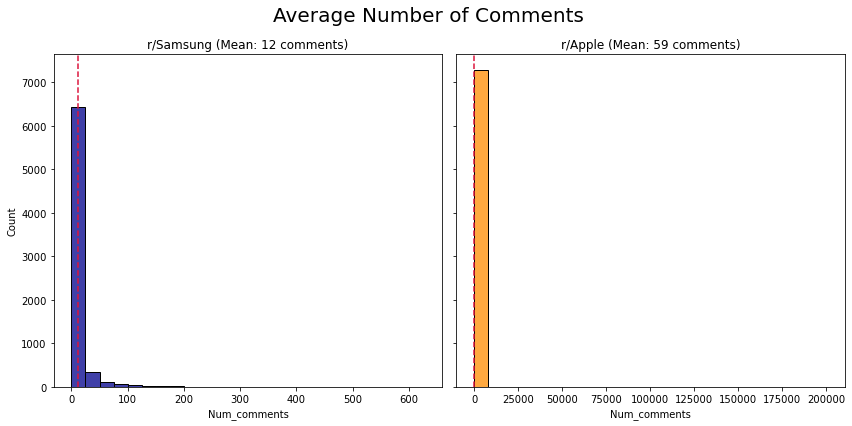

In [89]:
# Display plot
subplot_histograms(ss_clean, ap_clean, 'num_comments', 'Average Number of Comments', 25)

# Save plot
plt.savefig('../plots/hist_comments.png', dpi=150, bbox_inches='tight')

In [90]:
# Create a function for summary stats (for commentary below)
def num_comments(subreddit, data, col):
    min_comments = data[col].min()
    max_comments = data[col].max()
    mean_comments = round(data[col].mean())
    subreddit = subreddit
    print(f'The number of comments for posts under r/{subreddit} ranges from {min_comments} to {max_comments} (Mean: {mean_comments}).')

In [91]:
# Print commentary on number of comments for Samsung
num_comments('Samsung', ss_clean,'num_comments')

The number of comments for posts under r/Samsung ranges from 0 to 628 (Mean: 12).


In [92]:
# Print commentary on number of comments for Apple
num_comments('Apple', ap_clean,'num_comments')

The number of comments for posts under r/Apple ranges from 0 to 200500 (Mean: 59).


In [93]:
# Display outliers in 'num_comments' for Apple
ap_clean.sort_values(by='num_comments', ascending = False).head(1)

,author,num_comments,selftext,subreddit,title,date,string_date,datetime,title_len,selftext_len,is_samsung,text
13893,iamthatis,200500,part since hit comment cap thread httpsredditcomrapolloappcommentsjv6f78part3imgivingawayaniphon...,apple,giving away iphone promaxmini commenter random celebrate apollo reddits io update plus new ipho...,2020-11-15,2020-11-15 22:41:29,2020-11-15 22:41:29,195,2411,0,giving away iphone promaxmini commenter random celebrate apollo reddits io update plus new ipho...


On average, posts under r/Apple garnered more comments than posts under r/Samsung.

As seen from the above post under r/Apple, the number of comments it had attracted exceeded 200,000, which is an outlier. On closer examination of the 'text' column, the extremely high traction could be because the intent of the post was to giveaway iphones to randomly selected commenters. Hence, in general, we noted that there could be some noise in interpreting a post's traction solely by looking at the number of comments it attracts. Nonetheless, the content of the post is still relevant and useful to be retained.

### 4.6.Visualising Word Count (Word Cloud)

Next, we will plot some wordvclouds to visualise the frequency of words in the 2 subreddits. The size of a word shows how important it is e.g. how often it appears in a text — its frequency. 

In [94]:
# Create a function to plot WordCloud
# WordCloud and STOPWORDS have been imported
# Source: https://stackoverflow.com/questions/16645799/how-to-create-a-word-cloud-from-a-corpus-in-python

stopwords = set(STOPWORDS)

def show_wordcloud(data, title, colormap):
    wordcloud = WordCloud(
        background_color='white',
        colormap=colormap,
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=42 
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20, y = 1.3)
        fig.subplots_adjust(top=2)

    plt.imshow(wordcloud)
  

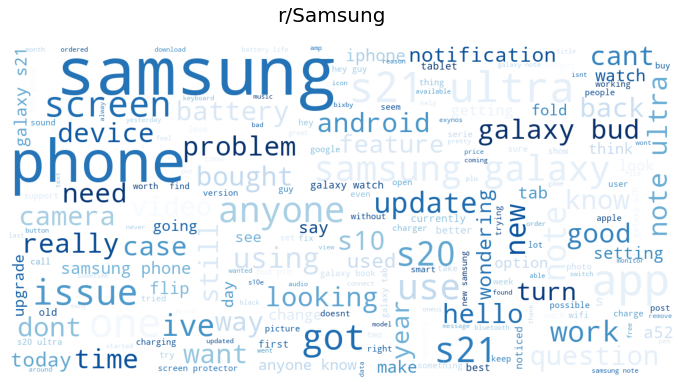

In [95]:
# Plot WordCloud for Samsung
show_wordcloud(ss_clean['text'], 'r/Samsung', 'Blues')

# Save plot
plt.savefig('../plots/wordcloud_samsung.png', dpi=150, bbox_inches='tight')

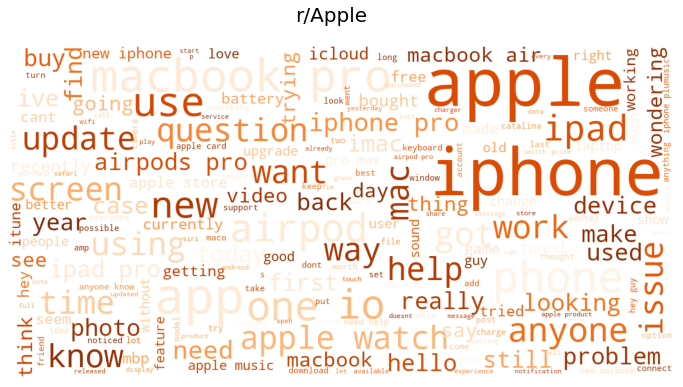

In [96]:
# Plot WordCloud for Apple
show_wordcloud(ap_clean['text'], 'r/Apple', 'Oranges')

# Save plot
plt.savefig('../plots/wordcloud_apple.png', dpi=150, bbox_inches='tight')

Unsurprisingly, the product names (e.g. s21, s20, s10, fold, macbook air, iphone, ipad, etc), operating systems (e.g. android, icloud, ios, etc), and device parts(e.g. battery, screen) are frequently found in the subreddits. Interestingly, it also appears that people seek advice/ help through their reddit posts as observed from words such as, issue, problem, help, wondering, etc, surfaced in the word cloud.

### 4.7.Visualising Word Count (Unigrams)

Finally, we will plot unigrams, bigrams and trigrams for each of the subreddits to visualise word counts. 

In [97]:
# Use cvec to visualise common words for Samsung
cv = CountVectorizer(stop_words='english', min_df=3)
cv.fit(ss_clean['text'])

text_cv = cv.transform(ss_clean['text'])
text_cv_df = pd.DataFrame(text_cv.todense(), columns=cv.get_feature_names())

In [98]:
# Show 15 most common words for Samsung
cv_ss = text_cv_df.sum().sort_values(ascending=False).head(15)
cv_ss

samsung    6275
phone      5870
galaxy     2683
s21        2397
like       2116
screen     2047
new        1618
know       1600
use        1557
ultra      1522
ive        1479
app        1405
dont       1394
issue      1392
note       1380
dtype: int64

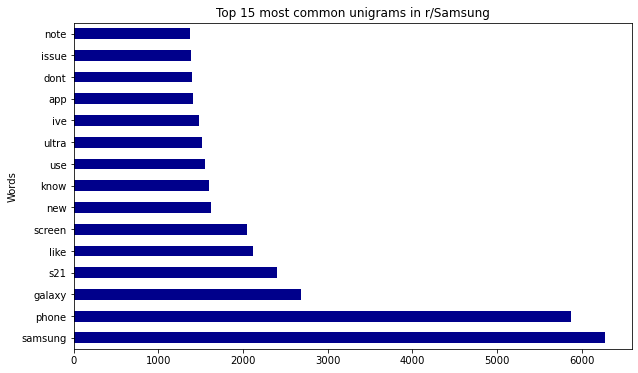

In [99]:
# Plot top 15 most common unigrams for Samsung
cv_ss.plot(kind='barh', title='Top 15 most common unigrams in r/Samsung', xlabel ='Words',figsize=(10, 6), color ='darkblue')

# Save plot
plt.savefig('../plots/cv_ss.png', dpi=150, bbox_inches='tight')

In [100]:
# Use cvec to visualise common words for Apple
cv = CountVectorizer(stop_words='english', min_df=3)
cv.fit(ap_clean['text'])

text_cv = cv.transform(ap_clean['text'])
text_cv_df = pd.DataFrame(text_cv.todense(), columns=cv.get_feature_names())

In [101]:
# Show 15 most common words for Apple
cv_ap = text_cv_df.sum().sort_values(ascending=False).head(15)
cv_ap

apple      7171
iphone     4099
app        3304
pro        3047
phone      2618
new        2608
like       2540
time       1978
macbook    1943
know       1901
use        1873
ipad       1648
want       1525
work       1512
io         1453
dtype: int64

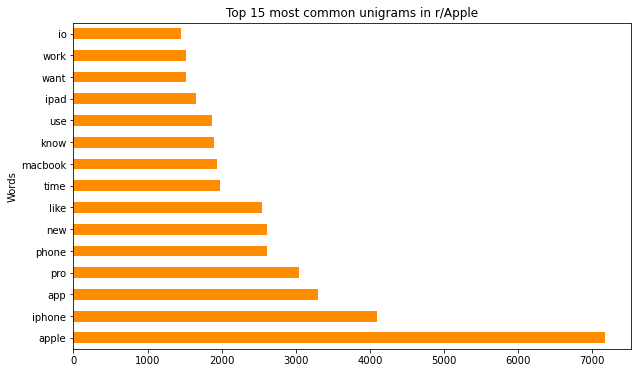

In [102]:
# Plot top 15 most common unigrams for Apple
cv_ap.plot(kind='barh', title='Top 15 most common unigrams in r/Apple', xlabel ='Words',figsize=(10, 6), color ='darkorange')

# Save plot
plt.savefig('../plots/cv_ap.png', dpi=150, bbox_inches='tight')

### 4.8.Visualising Word Count (Bigrams)

In [103]:
# 15 most common bigrams for Samsung
cv_bigrams = CountVectorizer(ngram_range=(2, 2), stop_words='english')
cv_bigrams.fit(ss_clean['text'])

text_cv_bigrams = cv_bigrams.transform(ss_clean['text'])
text_cv_bigrams_df = pd.DataFrame(text_cv_bigrams.todense(), columns=cv_bigrams.get_feature_names())

In [104]:
# Show 15 most bigrams words for Samsung
cv_bigrams_ss = text_cv_bigrams_df.sum().sort_values(ascending=False).head(15)
cv_bigrams_ss

s21 ultra           919
samsung galaxy      585
samsung phone       360
galaxy bud          317
new phone           289
battery life        280
screen protector    271
dont know           269
note ultra          268
galaxy s21          244
galaxy watch        218
bud pro             195
galaxy tab          158
ive tried           155
dont want           149
dtype: int64

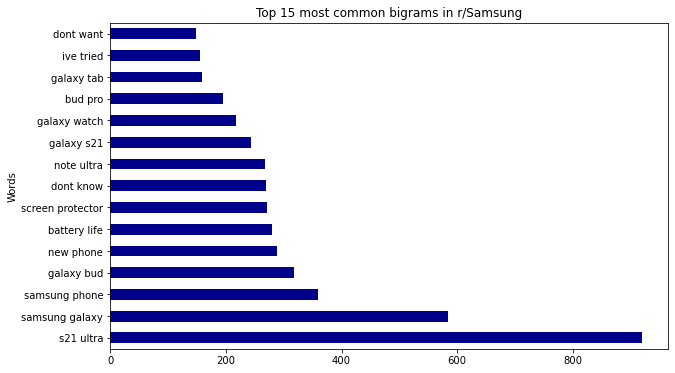

In [105]:
# Plot top 15 most common bigrams for Samsung
cv_bigrams_ss.plot(kind='barh', title='Top 15 most common bigrams in r/Samsung', xlabel ='Words',figsize=(10, 6), color ='darkblue')

# Save plot
plt.savefig('../plots/cv_bigrams_ss.png', dpi=150, bbox_inches='tight')

In [106]:
# 15 most common bigrams for Apple
cv_bigrams = CountVectorizer(ngram_range=(2, 2), stop_words='english')
cv_bigrams.fit(ap_clean['text'])

text_cv_bigrams = cv_bigrams.transform(ap_clean['text'])
text_cv_bigrams_df = pd.DataFrame(text_cv_bigrams.todense(), columns=cv_bigrams.get_feature_names())

In [107]:
# Show 15 most bigrams for Apple
cv_bigrams_ap = text_cv_bigrams_df.sum().sort_values(ascending=False).head(15)
cv_bigrams_ap

macbook pro      987
apple watch      573
apple store      444
app store        410
ipad pro         402
iphone pro       389
airpods pro      319
apple music      295
macbook air      279
apple card       232
new iphone       222
pro max          214
battery life     200
let know         182
apple product    181
dtype: int64

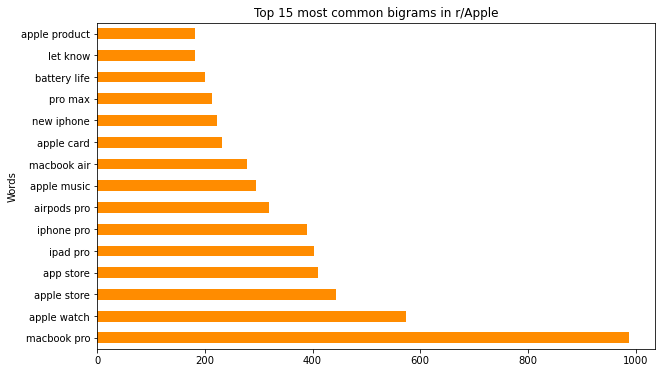

In [108]:
# Plot top 15 most common bigrams for Apple
cv_bigrams_ap.plot(kind='barh', title='Top 15 most common bigrams in r/Apple', xlabel ='Words',figsize=(10, 6), color ='darkorange')

# Save plot
plt.savefig('../plots/cv_bigrams_ap.png', dpi=150, bbox_inches='tight')

### 4.9.Visualising Word Count (Trigrams)

In [109]:
# 15 most common trigrams for Samsung
cv_trigrams = CountVectorizer(ngram_range=(3, 3), stop_words='english')
cv_trigrams.fit(ss_clean['text'])

text_cv_trigrams = cv_trigrams.transform(ss_clean['text'])
text_cv_trigrams_df = pd.DataFrame(text_cv_trigrams.todense(), columns=cv_trigrams.get_feature_names())

In [110]:
# Show 15 most trigrams words for Samsung
cv_trigrams_ss = text_cv_trigrams_df.sum().sort_values(ascending=False).head(15)
cv_trigrams_ss

galaxy bud pro            94
galaxy s21 ultra          85
samsung galaxy s21        68
galaxy book pro           65
samsung galaxy s20        45
samsung galaxy tab        43
samsung galaxy note       36
got s21 ultra             34
samsung s21 ultra         33
buy new phone             33
galaxy bud live           30
book pro 360              30
phone samsung galaxy      28
glass screen protector    28
samsung galaxy book       28
dtype: int64

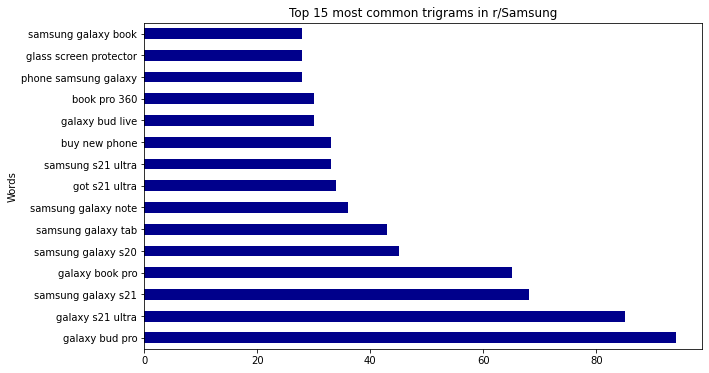

In [111]:
# Plot top 15 most common trigrams for Samsung
cv_trigrams_ss.plot(kind='barh', title='Top 15 most common trigrams in r/Samsung', xlabel ='Words',figsize=(10, 6), color ='darkblue')

# Save plot
plt.savefig('../plots/cv_trigrams_ss.png', dpi=150, bbox_inches='tight')

In [112]:
# 15 most common trigrams for Apple
cv_trigrams = CountVectorizer(ngram_range=(3, 3), stop_words='english')
cv_trigrams.fit(ap_clean['text'])

text_cv_trigrams = cv_trigrams.transform(ap_clean['text'])
text_cv_trigrams_df = pd.DataFrame(text_cv_trigrams.todense(), columns=cv_trigrams.get_feature_names())

In [113]:
# Show 15 most trigrams for Apple
cv_trigrams_ap = text_cv_trigrams_df.sum().sort_values(ascending=False).head(15)
cv_trigrams_ap

iphone pro max              140
new macbook pro             101
apple watch series           88
let know think               49
2019 macbook pro             45
iphone apple watch           36
macbook pro inch             35
long story short             34
macbook pro 2019             33
2017 macbook pro             33
ipad pro 129                 31
new ipad pro                 30
went apple store             27
help greatly appreciated     27
inch macbook pro             27
dtype: int64

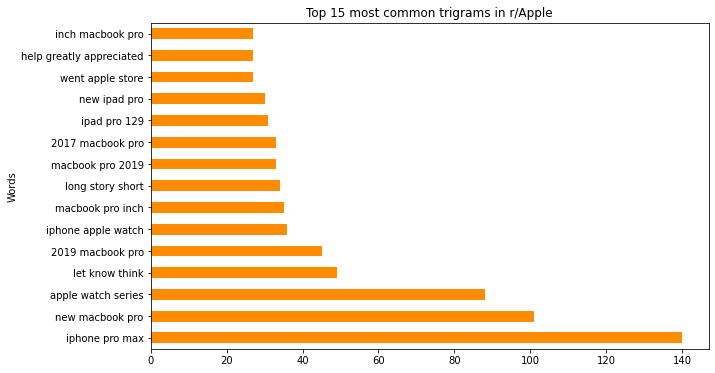

In [114]:
# Plot top 15 most common trigrams for Apple
cv_trigrams_ap.plot(kind='barh', title='Top 15 most common trigrams in r/Apple', xlabel ='Words',figsize=(10, 6), color ='darkorange')

# Save plot
plt.savefig('../plots/cv_trigrams_ap.png', dpi=150, bbox_inches='tight')